https://courses.edx.org/courses/course-v1:MITx+15.071x_3+1T2016/courseware/78a8f19e5e54432a938ae62dc0246780/ac54e7a579bd44258ab0b446ac8091c4/

separating spam from ham (Part 1)

Nearly every email user has at some point encountered a "spam" email, which is an unsolicited message often advertising a product, containing links to malware, or attempting to scam the recipient. Roughly 80-90% of more than 100 billion emails sent each day are spam emails, most being sent from botnets of malware-infected computers. The remainder of emails are called "ham" emails.

As a result of the huge number of spam emails being sent across the Internet each day, most email providers offer a spam filter that automatically flags likely spam messages and separates them from the ham. Though these filters use a number of techniques (e.g. looking up the sender in a so-called "Blackhole List" that contains IP addresses of likely spammers), most rely heavily on the analysis of the contents of an email via text analytics.

In this homework problem, we will build and evaluate a spam filter using a publicly available dataset first described in the 2006 conference paper "Spam Filtering with Naive Bayes -- Which Naive Bayes?" by V. Metsis, I. Androutsopoulos, and G. Paliouras. The "ham" messages in this dataset come from the inbox of former Enron Managing Director for Research Vincent Kaminski, one of the inboxes in the Enron Corpus. One source of spam messages in this dataset is the SpamAssassin corpus, which contains hand-labeled spam messages contributed by Internet users. The remaining spam was collected by Project Honey Pot, a project that collects spam messages and identifies spammers by publishing email address that humans would know not to contact but that bots might target with spam. The full dataset we will use was constructed as roughly a 75/25 mix of the ham and spam messages.

The dataset contains just two fields:

    text: The text of the email.
    spam: A binary variable indicating if the email was spam.


In [1]:
emails = read.csv("emails.csv", stringsAsFactors = FALSE)

In [2]:
str(emails)

'data.frame':	5728 obs. of  2 variables:
 $ text: chr  "Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqg"| __truncated__ "Subject: the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ra"| __truncated__ "Subject: unbelievable new homes made easy  im wanting to show you this  homeowner  you have been pre - approved for a $ 454 , 1"| __truncated__ "Subject: 4 color printing special  request additional information now ! click here  click here for a printable version of our o"| __truncated__ ...
 $ spam: int  1 1 1 1 1 1 1 1 1 1 ...


In [3]:
sum(emails$spam)

[1] 1368

In [5]:
emails[1:5,]

,text,spam
1,"Subject: naturally irresistible your corporate identity lt is really hard to recollect a company : the market is full of suqgestions and the information isoverwhelminq ; but a good catchy logo , stylish statlonery and outstanding website will make the task much easier . we do not promise that havinq ordered a iogo your company will automaticaily become a world ieader : it isguite ciear that without good products , effective business organization and practicable aim it will be hotat nowadays market ; but we do promise that your marketing efforts will become much more effective . here is the list of clear benefits : creativeness : hand - made , original logos , specially done to reflect your distinctive company image . convenience : logo and stationery are provided in all formats ; easy - to - use content management system letsyou change your website content and even its structure . promptness : you will see logo drafts within three business days . affordability : your marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction guaranteed : we provide unlimited amount of changes with no extra fees for you to be surethat you will love the result of this collaboration . have a look at our portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _",1
2,Subject: the stock trading gunslinger fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no,1
3,"Subject: unbelievable new homes made easy im wanting to show you this homeowner you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate . this offer is being extended to you unconditionally and your credit is in no way a factor . to take advantage of this limited time opportunity all we ask is that you visit our website and complete the 1 minute post approval form look foward to hearing from you , dorcas pittman",1
4,"Subject: 4 color printing special request additional information now ! click here click here for a printable version of our order form ( pdf format ) phone : ( 626 ) 338 - 8090 fax : ( 626 ) 338 - 8102 e - mail : ramsey @ goldengraphix . com request additional information now ! click here click here for a printable version of our order form ( pdf format ) golden graphix & printing 5110 azusa canyon rd . irwindale , ca 91706 this e - mail message is an advertisement and / or solicitation .",1
5,"Subject: do not have money , get software cds from here ! software compatibility . . . . ain ' t it great ? grow old along with me the best is yet to be . all tradgedies are finish ' d by death . all comedies are ended by marriage .",1


In [6]:
max(nchar(emails$text))

[1] 43952

In [8]:
which.min(nchar(emails$text))

[1] 1992

In [9]:
library(tm)
library(SnowballC)
library(caTools)

Loading required package: NLP
Warning message:
: package ‘SnowballC’ was built under R version 3.3.0

In [10]:
corpus = Corpus(VectorSource(emails$text))

In [11]:
corpus = tm_map(corpus, tolower)
corpus = tm_map(corpus, PlainTextDocument)
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, stopwords("english"))
corpus = tm_map(corpus, stemDocument)

In [12]:
dtm = DocumentTermMatrix(corpus)

In [13]:
dtm

<<DocumentTermMatrix (documents: 5728, terms: 28687)>>
Non-/sparse entries: 481719/163837417
Sparsity           : 100%
Maximal term length: 24
Weighting          : term frequency (tf)

In [14]:
spdtm = removeSparseTerms(dtm, 0.95)

In [15]:
spdtm

<<DocumentTermMatrix (documents: 5728, terms: 330)>>
Non-/sparse entries: 213551/1676689
Sparsity           : 89%
Maximal term length: 10
Weighting          : term frequency (tf)

In [16]:
emailsSparse = as.data.frame(as.matrix(spdtm))

In [17]:
str(emailsSparse)

'data.frame':	5728 obs. of  330 variables:
 $ 000       : num  0 0 0 0 0 0 0 0 1 0 ...
 $ 2000      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 2001      : num  0 0 0 0 0 0 0 0 1 0 ...
 $ 713       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 853       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ abl       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ access    : num  0 0 0 0 0 0 1 0 0 0 ...
 $ account   : num  0 0 0 0 0 0 1 0 0 0 ...
 $ addit     : num  0 0 0 2 0 0 1 0 0 0 ...
 $ address   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ allow     : num  0 0 0 0 0 0 1 0 0 0 ...
 $ alreadi   : num  0 0 0 0 0 0 1 0 0 0 ...
 $ also      : num  0 0 0 0 0 0 1 0 0 0 ...
 $ analysi   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ anoth     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ applic    : num  0 0 0 0 0 0 3 0 0 0 ...
 $ appreci   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ approv    : num  0 0 2 0 0 0 0 0 0 0 ...
 $ april     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ area      : num  0 0 0 0 0 0 1 0 0 0 ...
 $ arrang    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ask       : num  0 0 1 0 0 0 0

In [18]:
colnames(emailsSparse) = make.names(colnames(emailsSparse))

In [19]:
colnames(emailsSparse)

[1] "X000"       "X2000"      "X2001"      "X713"       "X853"      
  [6] "abl"        "access"     "account"    "addit"      "address"   
 [11] "allow"      "alreadi"    "also"       "analysi"    "anoth"     
 [16] "applic"     "appreci"    "approv"     "april"      "area"      
 [21] "arrang"     "ask"        "assist"     "associ"     "attach"    
 [26] "attend"     "avail"      "back"       "base"       "begin"     
 [31] "believ"     "best"       "better"     "book"       "bring"     
 [36] "busi"       "buy"        "call"       "can"        "case"      
 [41] "chang"      "check"      "click"      "com"        "come"      
 [46] "comment"    "communic"   "compani"    "complet"    "confer"    
 [51] "confirm"    "contact"    "continu"    "contract"   "copi"      
 [56] "corp"       "corpor"     "cost"       "cours"      "creat"     
 [61] "credit"     "crenshaw"   "current"    "custom"     "data"      
 [66] "date"       "day"        "deal"       "dear"       "depart"    
 [71] "deriv"      "design"     "detail"     "develop"    "differ"    
 [76] "direct"     "director"   "discuss"    "doc"        "don"       
 [81] "done"       "due"        "ect"        "edu"        "effect"    
 [86] "effort"     "either"     "email"      "end"        "energi"    
 [91] "engin"      "enron"      "etc"        "even"       "event"     
 [96] "expect"     "experi"     "fax"        "feel"       "file"      
[101] "final"      "financ"     "financi"    "find"       "first"     
[106] "follow"     "form"       "forward"    "free"       "friday"    
[111] "full"       "futur"      "gas"        "get"        "gibner"    
[116] "give"       "given"      "good"       "great"      "group"     
[121] "happi"      "hear"       "hello"      "help"       "high"      
[126] "home"       "hope"       "hou"        "hour"       "houston"   
[131] "howev"      "http"       "idea"       "immedi"     "import"    
[136] "includ"     "increas"    "industri"   "info"       "inform"    
[141] "interest"   "intern"     "internet"   "interview"  "invest"    
[146] "invit"      "involv"     "issu"       "john"       "join"      
[151] "juli"       "just"       "kaminski"   "keep"       "kevin"     
[156] "know"       "last"       "let"        "life"       "like"      
[161] "line"       "link"       "list"       "locat"      "london"    
[166] "long"       "look"       "lot"        "made"       "mail"      
[171] "make"       "manag"      "mani"       "mark"       "market"    
[176] "may"        "mean"       "meet"       "member"     "mention"   
[181] "messag"     "might"      "model"      "monday"     "money"     
[186] "month"      "morn"       "move"       "much"       "name"      
[191] "need"       "net"        "new"        "next."      "note"      
[196] "now"        "number"     "offer"      "offic"      "one"       
[201] "onlin"      "open"       "oper"       "opportun"   "option"    
[206] "order"      "origin"     "part"       "particip"   "peopl"     
[211] "per"        "person"     "phone"      "place"      "plan"      
[216] "pleas"      "point"      "posit"      "possibl"    "power"     
[221] "present"    "price"      "problem"    "process"    "product"   
[226] "program"    "project"    "provid"     "public"     "put"       
[231] "question"   "rate"       "read"       "real"       "realli"    
[236] "receiv"     "recent"     "regard"     "relat"      "remov"     
[241] "repli"      "report"     "request"    "requir"     "research"  
[246] "resourc"    "respond"    "respons"    "result"     "resum"     
[251] "return"     "review"     "right"      "risk"       "robert"    
[256] "run"        "say"        "schedul"    "school"     "secur"     
[261] "see"        "send"       "sent"       "servic"     "set"       
[266] "sever"      "shall"      "shirley"    "short"      "sinc"      
[271] "sincer"     "site"       "softwar"    "soon"       "sorri"     
[276] "special"    "specif"     "start"      "state"      "still"     
[281] "stinson"    "studen

In [24]:
t=colSums(emailsSparse)
which.max(t)


enron 
   92

In [25]:
which.max(colSums(emailsSparse))

enron 
   92

In [26]:
emailsSparse$spam = emails$spam

In [27]:
max(t)

[1] 13388

In [31]:
sort(colSums(emailsSparse), decreasing = TRUE) 

enron        ect    subject       vinc       will        hou        com 
     13388      11427      10202       8532       8252       5577       5443 
     pleas      X2000   kaminski        can      thank    forward       time 
      5113       4967       4801       4257       3730       3161       3145 
     X2001   research     market       work     inform      price       meet 
      3089       2820       2750       2708       2701       2694       2623 
      know      group      manag        may        get       like        use 
      2614       2604       2600       2465       2462       2352       2330 
      need       busi    compani        new       mail       risk      model 
      2328       2313       2290       2281       2269       2267       2199 
    energi      power        one      email     regard       look     messag 
      2179       2117       2108       2066       2045       2003       1983 
       let       year       make    develop       also        day   interest 
      1963       1890       1884       1882       1864       1860       1814 
      week       corp    shirley       call        edu       http    houston 
      1758       1692       1689       1687       1627       1609       1582 
       see     receiv     follow    contact    present    project     option 
      1567       1557       1552       1543       1543       1522       1488 
      want    program       help       list     provid       send       spam 
      1488       1438       1430       1410       1405       1379       1368 
     trade       take       just    request   communic     servic  interview 
      1366       1361       1354       1344       1343       1337       1333 
   discuss        www        now     confer       best     report     includ 
      1326       1323       1300       1297       1291       1279       1238 
     think      order    product       date     number     attach      offer 
      1216       1210       1197       1187       1182       1176       1171 
   address      avail   question      next.       free       sent      visit 
      1154       1152       1152       1145       1141       1126       1126 
      well     system   crenshaw      posit       X713       good       name 
      1125       1118       1115       1104       1097       1097       1089 
     state     financ    schedul        gas      offic    univers       give 
      1086       1073       1071       1070       1068       1059       1055 
   stinson    current       john        fax      chang       X000      phone 
      1051       1044       1042       1038       1035       1007       1001 
      last       talk     review    process   industri     credit      month 
       998        981        976        975        970        960        958 
     peopl       data       issu      resum      first       team   opportun 
       958        955        944        933        929        926        918 
      site        two    financi       plan       come     origin      shall 
       913        911        909        904        903        892        884 
     start        ask       find     invest       back        way       much 
       880        871        867        867        864        864        861 
      hope      secur     friday    support     london       dear       base 
       858        857        854        854        843        838        837 
     great    account      today    respons       cost       oper       copi 
       837        829        828        824        821        820        797 
    custom    possibl     access       term   particip     associ      money 
       796        796        789        786        782        777        776 
     addit       file      click     person       mani       book    softwar 
       774        770        769        767        758        756        739 
    requir     within        set    student      futur       valu       rate 
       736        732      

In [32]:
sum(emailsSparse$spam)

[1] 1368

In [34]:
sort(colSums(subset(emailsSparse, spam ==0)), decreasing = TRUE) 

enron        ect    subject       vinc       will        hou      X2000 
     13388      11417       8625       8531       6802       5569       4935 
  kaminski      pleas        com      thank        can      X2001    forward 
      4801       4494       4444       3558       3426       3060       2952 
  research       time       meet      group       know      manag       work 
      2752       2552       2544       2474       2345       2334       2293 
     price      model     market     energi       risk       like        may 
      2191       2170       2150       2124       2097       1980       1976 
     power       need     inform     regard        let        use        new 
      1972       1890       1883       1859       1856       1784       1777 
       get    develop    shirley       corp        edu       look       also 
      1768       1691       1687       1643       1620       1607       1604 
   houston     messag       week       year        one       call        day 
      1577       1538       1527       1523       1516       1497       1440 
    option   interest       busi    present       mail    project  interview 
      1432       1429       1416       1397       1352       1328       1320 
    follow    contact       make    discuss     confer   communic        see 
      1308       1301       1281       1270       1264       1251       1238 
   request    compani      email       help      trade     attach   crenshaw 
      1227       1225       1201       1168       1167       1155       1115 
      X713      think    program   question       want       date       take 
      1097       1084       1080       1069       1068       1060       1057 
   schedul    stinson     financ    univers       john       http       send 
      1054       1051       1038       1025       1022       1009        986 
     next.       sent     provid        fax       well     number       talk 
       975        971        970        963        961        951        943 
    servic      offic       best      resum     includ      visit      posit 
       942        935        933        928        924        920        917 
      list        gas        www       give       good       last      avail 
       907        905        897        883        876        874        872 
      data       issu      phone       team     friday      shall    current 
       868        865        858        850        847        844        841 
    review      chang       just     receiv       hope     london    process 
       834        831        830        830        828        828        826 
    system      state     credit        ask     origin        two    product 
       816        806        798        797        796        787        776 
    report   opportun       come       name       back       plan       dear 
       772        760        748        745        739        738        734 
   support   industri      first        now   particip     associ    possibl 
       734        731        726        725        717        715        712 
   respons    student      month    financi       copi    address       book 
       711        710        709        702        700        693        680 
     april      deriv        doc       much       oper      order       find 
       677        673        673        669        669        669        665 
      file        set      great      kevin      addit       cost      offer 
       659        658        655        654        648        646        643 
  director       base     gibner       juli     monday       term     access 
       640        635        633        630        630        625        617 
     invit     school       note      peopl    problem       valu       mark 
       614        607        600        599        593        590        588 
       way      start      today     depart      relat     person      cours 
       586        580      

In [38]:
sort(colSums(subset(emailsSparse, spam ==1)), decreasing = TRUE)

subject       will       spam    compani        com       mail       busi 
      1577       1450       1368       1065        999        917        897 
     email        can     inform     receiv        get      money      pleas 
       865        831        818        727        694        662        619 
      free       make       http     market       time        one        now 
       606        603        600        600        593        592        575 
      X000      click        use      order     invest      offer       just 
       560        552        546        541        540        528        524 
     secur     report     websit        new       list      price        may 
       520        507        506        504        503        503        489 
   address       site     messag    softwar       need     provid    account 
       461        455        445        440        438        435        428 
       www    product        day       want       work       look     servic 
       426        421        420        420        415        396        395 
      send   interest       like       year     custom      peopl       best 
       393        385        372        367        363        359        358 
   program      remov     within      onlin       name        see       life 
       358        357        346        345        344        329        320 
    includ        net       take     system      start       home      futur 
       314        305        304        302        300        285        282 
     avail      state        way       know      manag       help   internet 
       280        280        278        269        266        262        262 
      also      today      month      right     follow    contact       made 
       260        251        249        249        244        242        242 
  industri        web     result     number       week        per        don 
       239        238        237        231        231        230        226 
   success    special       good    forward       high       mani    financi 
       226        225        221        209        208        208        207 
     visit      chang    current      first       base       find     effect 
       206        204        203        203        202        202        201 
      rate        buy      trade     expect     person    without     design 
       201        199        199        198        198        198        196 
      form    project       even    complet       much    develop       call 
       196        194        193        192        192        191        190 
     thing      posit     regard       wish      great       cost       link 
       188        187        186        185        182        175        174 
    requir    version     access       give      thank    increas      next. 
       174        174        172        172        172        171        170 
      risk       plan        gas       info       well     credit       term 
       170        166        165        165        164        162        161 
     engin       line   opportun       real      repli       come       sent 
       160        159        158        158        158        155        155 
    return       full     corpor       oper    process    present      power 
       154        152        151        151        149        146        145 
      hour     believ      phone     review        tri     applic      hello 
       144        143        143        142        140        139        139 
     check     immedi       read      offic      think       mean       valu 
       137        136        134        133        132        131        131 
     group      place       date      addit       back       keep       last 
       130        128        127        126        125        125        124 
       two     assist       part      relat    support     import        say 
       124        123    

First, convert the dependent variable to a factor with "emailsSparse$spam = as.factor(emailsSparse$spam)".

Next, set the random seed to 123 and use the sample.split function to split emailsSparse 70/30 into a training set called "train" and a testing set called "test". Make sure to perform this step on emailsSparse instead of emails.

Using the training set, train the following three machine learning models. The models should predict the dependent variable "spam", using all other available variables as independent variables. Please be patient, as these models may take a few minutes to train.

1) A logistic regression model called spamLog. You may see a warning message here - we'll discuss this more later.

2) A CART model called spamCART, using the default parameters to train the model (don't worry about adding minbucket or cp). Remember to add the argument method="class" since this is a binary classification problem.

3) A random forest model called spamRF, using the default parameters to train the model (don't worry about specifying ntree or nodesize). Directly before training the random forest model, set the random seed to 123 (even though we've already done this earlier in the problem, it's important to set the seed right before training the model so we all obtain the same results. Keep in mind though that on certain operating systems, your results might still be slightly different).

For each model, obtain the predicted spam probabilities for the training set. Be careful to obtain probabilities instead of predicted classes, because we will be using these values to compute training set AUC values. Recall that you can obtain probabilities for CART models by not passing any type parameter to the predict() function, and you can obtain probabilities from a random forest by adding the argument type="prob". For CART and random forest, you need to select the second column of the output of the predict() function, corresponding to the probability of a message being spam.

You may have noticed that training the logistic regression model yielded the messages "algorithm did not converge" and "fitted probabilities numerically 0 or 1 occurred". Both of these messages often indicate overfitting and the first indicates particularly severe overfitting, often to the point that the training set observations are fit perfectly by the model. Let's investigate the predicted probabilities from the logistic regression model.

In [39]:
emailsSparse$spam = as.factor(emailsSparse$spam)

In [40]:
set.seed(123)

In [41]:
split = sample.split(emailsSparse$spam, SplitRatio = 0.7)

In [42]:
train = subset(emailsSparse, split == TRUE)
test = subset(emailsSparse, split == FALSE)

In [43]:
library(rpart)
library(rpart.plot)
library(randomForest)

Warning message:
: package ‘rpart.plot’ was built under R version 3.3.0randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [44]:
spamLog = glm(spam~., data = train, family = binomial)

Warning message:
: glm.fit: algorithm did not convergeWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred

In [45]:
spamCART = rpart(spam~., data = train, method = "class")

In [46]:
set.seed(123)
spamRF = randomForest(spam~., data = train)

In [49]:
predTrainLog = predict(spamLog, type = "response")

In [50]:
summary(predTrainLog)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2389  0.0000  1.0000 

In [53]:
sum(predTrainLog < 0.00001)

[1] 3046

In [54]:
sum(predTrainLog > 0.99999)

[1] 954

In [57]:
sum(predTrainLog >= 0.00001 & predTrainLog <= 0.99999)

[1] 10

In [59]:
length(predTrainLog)

[1] 4010

In [60]:
nrow(train)

[1] 4010

For each model, obtain the predicted spam probabilities for the training set. Be careful to obtain probabilities instead of predicted classes, because we will be using these values to compute training set AUC values. Recall that you can obtain probabilities for CART models by not passing any type parameter to the predict() function, and you can obtain probabilities from a random forest by adding the argument type="prob". For CART and random forest, you need to select the second column of the output of the predict() function, corresponding to the probability of a message being spam.

In [64]:
predTrainCART = predict(spamCART)[,2]

In [65]:
predTrainRF = predict(spamRF, type = "prob")[,2]

In [66]:
summary(spamLog)


Call:
glm(formula = spam ~ ., family = binomial, data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.011   0.000   0.000   0.000   1.354  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -3.082e+01  1.055e+04  -0.003    0.998
X000         1.474e+01  1.058e+04   0.001    0.999
X2000       -3.631e+01  1.556e+04  -0.002    0.998
X2001       -3.215e+01  1.318e+04  -0.002    0.998
X713        -2.427e+01  2.914e+04  -0.001    0.999
X853        -1.212e+00  5.942e+04   0.000    1.000
abl         -2.049e+00  2.088e+04   0.000    1.000
access      -1.480e+01  1.335e+04  -0.001    0.999
account      2.488e+01  8.165e+03   0.003    0.998
addit        1.463e+00  2.703e+04   0.000    1.000
address     -4.613e+00  1.113e+04   0.000    1.000
allow        1.899e+01  6.436e+03   0.003    0.998
alreadi     -2.407e+01  3.319e+04  -0.001    0.999
also         2.990e+01  1.378e+04   0.002    0.998
analysi     -2.405e+01  3.860e+04  -0.001    1.000
a

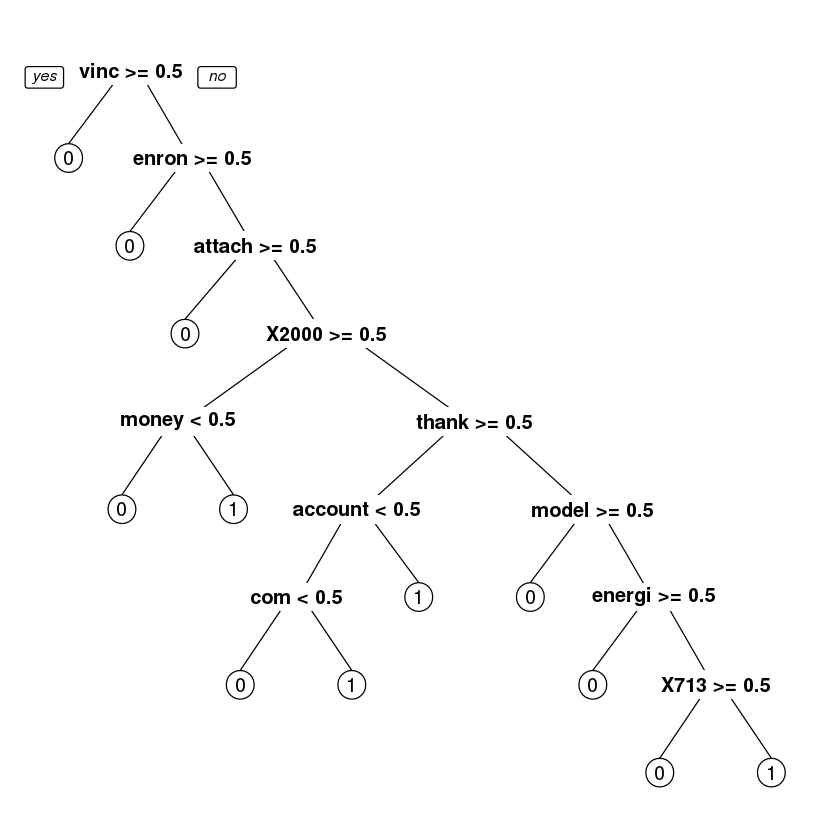

In [67]:
prp(spamCART)

In [68]:
t = table(train$spam, predTrainLog> 0.5)
t

   
    FALSE TRUE
  0  3052    0
  1     4  954

In [69]:
sum(diag(t))/nrow(train)

[1] 0.9990025

In [70]:
library(ROCR)

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [72]:
as.numeric(performance(prediction(predTrainLog,train$spam),"auc")@y.values)

[1] 0.9999959

In [73]:
t = table(train$spam, predTrainCART>0.5)
t

   
    FALSE TRUE
  0  2885  167
  1    64  894

In [74]:
sum(diag(t))/nrow(train)

[1] 0.942394

In [75]:
as.numeric(performance(prediction(predTrainCART,train$spam),"auc")@y.values)

[1] 0.9696044

In [76]:
t = table(train$spam, predTrainRF>0.5)
t

   
    FALSE TRUE
  0  3013   39
  1    44  914

In [77]:
sum(diag(t))/nrow(train)

[1] 0.9793017

In [78]:
as.numeric(performance(prediction(predTrainRF,train$spam),"auc")@y.values)

[1] 0.9979116

Obtain predicted probabilities for the testing set for each of the models, again ensuring that probabilities instead of classes are obtained.

What is the testing set accuracy of spamLog, using a threshold of 0.5 for predictions?

In [79]:
predTestLog = predict(spamLog,newdata = test, type = "response")

In [80]:
t = table(test$spam, predTestLog>0.5)
t

   
    FALSE TRUE
  0  1257   51
  1    34  376

In [81]:
sum(diag(t))/nrow(test)

[1] 0.9505239

In [82]:
as.numeric(performance(prediction(predTestLog,test$spam), "auc")@y.values)

[1] 0.9627517

In [85]:
predTestCART = predict(spamCART, newdata = test)[,2]

In [86]:
t = table(test$spam, predTestCART>0.5)
t
sum(diag(t))/nrow(test)
as.numeric(performance(prediction(predTestCART,test$spam), "auc")@y.values)

   
    FALSE TRUE
  0  1228   80
  1    24  386

[1] 0.9394645

[1] 0.963176

In [87]:
predTestRF = predict(spamRF, newdata = test, type = "prob")[,2]

In [88]:
t = table(test$spam, predTestRF>0.5)
t
sum(diag(t))/nrow(test)
as.numeric(performance(prediction(predTestRF,test$spam), "auc")@y.values)

   
    FALSE TRUE
  0  1290   18
  1    25  385

[1] 0.9749709

[1] 0.9975656